<a href="https://colab.research.google.com/github/EllingtonKirby/Workbooks/blob/master/pet_breeds_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 12.0 MB/s 
     |████████████████████████████████| 4.7 MB 62.2 MB/s 
     |████████████████████████████████| 365 kB 72.2 MB/s 
     |████████████████████████████████| 1.3 MB 66.0 MB/s 
     |████████████████████████████████| 212 kB 74.6 MB/s 
     |████████████████████████████████| 120 kB 73.3 MB/s 
     |████████████████████████████████| 115 kB 77.5 MB/s 
     |████████████████████████████████| 127 kB 75.3 MB/s 
     |████████████████████████████████| 6.6 MB 57.4 MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
#hide
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
(path/"images").ls()

(#7393) [Path('images/Ragdoll_139.jpg'),Path('images/english_setter_194.jpg'),Path('images/Maine_Coon_266.jpg'),Path('images/Abyssinian_217.jpg'),Path('images/pug_171.jpg'),Path('images/shiba_inu_89.jpg'),Path('images/shiba_inu_81.jpg'),Path('images/great_pyrenees_30.jpg'),Path('images/samoyed_48.jpg'),Path('images/saint_bernard_140.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]
fname

Path('images/Ragdoll_139.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Ragdoll']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 # Below is an example of Presizing
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

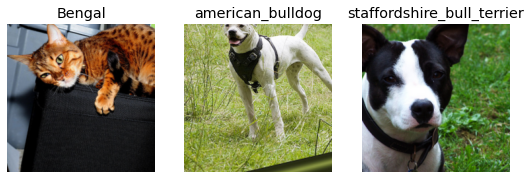

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.535282,0.333117,0.111637,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.536651,0.307307,0.097429,01:13
1,0.332754,0.238919,0.076455,01:15


In [ ]:
x,y = dls.one_batch()
y

TensorCategory([21, 14, 34, 25, 18,  4, 11, 13, 27, 27, 13, 31, 29, 23, 11,  3,  3, 20,  6, 34, 31,  2, 12, 33, 14, 26, 13, 27, 35,  4, 10, 18, 13, 11,  7,  5, 14, 18, 19, 29, 28, 31,  4, 31, 26, 13,
                 5, 12, 29, 27, 20, 17, 12, 11,  9, 33, 22, 16, 28, 34,  9,  8, 33, 14], device='cuda:0')

In [ ]:
x.shape

torch.Size([64, 3, 224, 224])

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([3.4064e-09, 1.8402e-09, 2.8298e-08, 6.1339e-09, 1.6160e-08, 1.2119e-09, 6.3827e-08, 2.2289e-08, 7.5371e-08, 3.7388e-09, 2.3506e-09, 2.0569e-09, 5.5973e-06, 8.1713e-07, 5.5763e-09,
            9.2027e-09, 8.9381e-09, 3.6248e-09, 4.1138e-08, 4.3686e-06, 1.2880e-09, 9.9989e-01, 1.9171e-07, 8.8408e-08, 1.3096e-07, 3.9011e-06, 6.3269e-09, 2.2836e-06, 1.0826e-08, 1.3425e-07,
            5.1316e-05, 2.1052e-05, 8.9581e-08, 5.2199e-08, 1.6566e-06, 1.6272e-05, 4.2767e-10])

In [ ]:
# 37 predictions for each of the possible breeds, adds up to one
# to get the actual prediction out of this tensor we can use Softmax
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

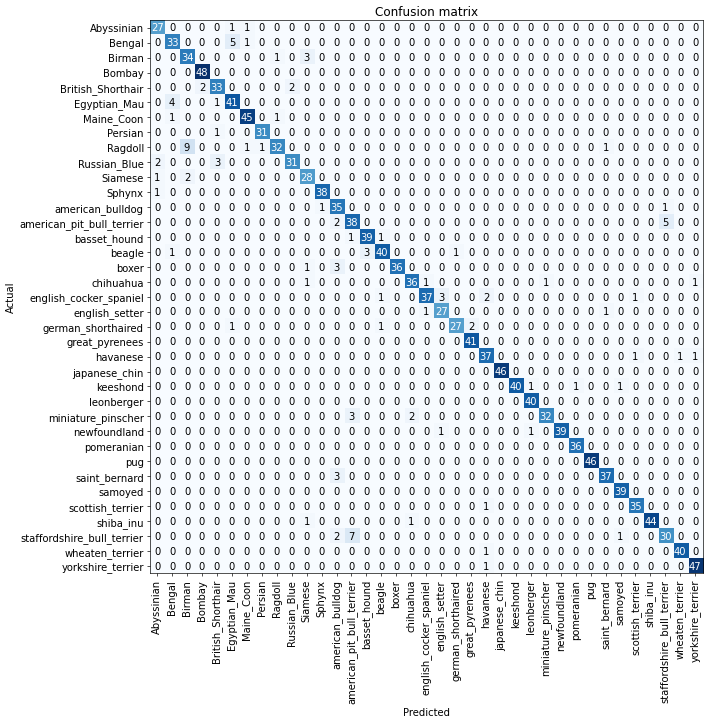

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 9),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


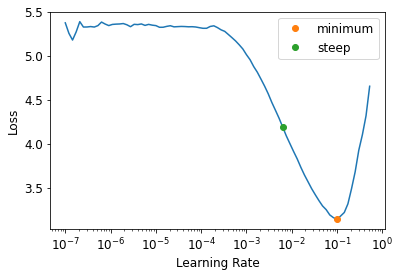

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 6.31e-03


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.293205,0.350460,0.104195,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.569361,0.384985,0.113667,01:15
1,0.328011,0.274695,0.088633,01:13


In [ ]:
learn.fine_tune??

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.155520,0.285013,0.095399,01:12
1,0.489236,0.251336,0.083221,01:12
2,0.313974,0.199065,0.064953,01:09


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=6.30957365501672e-05)

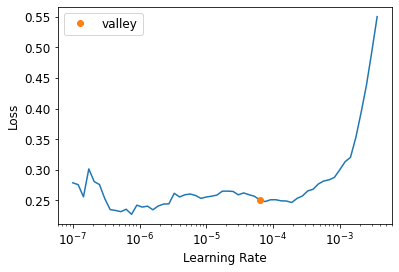

In [ ]:
learn.lr_find()

In [ ]:
# So up to this point we are basically doing what fine_tune does manually
# we trained for 3 epochs with fit_one_cycle which adjusts the learning rate as we train
# then we unfroze the net to train the whole model for 6 epochs
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.255957,0.194545,0.062923,01:18
1,0.257799,0.193115,0.064953,01:23
2,0.232899,0.196424,0.064276,01:16
3,0.206716,0.187269,0.060893,01:15
4,0.183260,0.182857,0.057510,01:16
5,0.173478,0.182632,0.062923,01:15


In [ ]:
# Here is an example of using Discriminative Learning Rates on transfer learning
# We are starting at 10^-6, and then ending at 10^-4 

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.140884,0.320241,0.101489,01:12
1,0.545621,0.237978,0.067659,01:10
2,0.337494,0.217851,0.069689,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.248414,0.204138,0.064276,01:15
1,0.235823,0.198851,0.057510,01:13
2,0.249245,0.202766,0.062923,01:14
3,0.217107,0.198933,0.056157,01:13
4,0.205084,0.193396,0.057510,01:15
5,0.167353,0.193286,0.055480,01:14
6,0.167096,0.192213,0.058863,01:16
7,0.146760,0.190161,0.057510,01:13


KeyboardInterrupt: ignored

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.290235,0.285800,0.094046,01:07
1,0.562752,0.323125,0.095399,01:08
2,0.426005,0.266282,0.085927,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.273027,0.265695,0.077808,01:11


KeyboardInterrupt: ignored